# **Abstract**

IKEA is a Swedish multinational conglomerate based in the Netherlands that designs and sells ready-to-assemble furniture, kitchen appliances, home accessories, and various other goods and home services. 

Large verity of furniture are sold by Ikea so it has both numerical and categorical data and I will be using binary classification, multiclass classification, regression models.

# **About Data Set**

> The dataset contained 3543 observations of 11 variables.

> Variables : 

> 1. Depth
> 2. Height
> 3. Width
> 4. Old_price
> 5. Sellable_online
> 6. Other_colors
> 7. Short_description
> 8. Name
> 9. Category
> 10. Price
> 11. Designer



## AutoML

Importing data and required models
Using above data set I'm going to perform 

1.Binary classification : to predict wheather product is sellable online or not using H2o auto ML.

2.Regression : to predict the price of the products in Ikea using other independent features.

3.Multiclass classification : to predict the category of the product using other independent features.

###Is the relationship significant?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv')

df.head()

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
0,44.0,103.0,52.0,0,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,149.0
1,45.0,102.0,40.0,0,True,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395.0
2,47.0,103.0,46.0,0,True,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395.0
3,53.0,104.0,43.0,295,True,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,FREKVENS,Bar furniture,177.0
4,52.0,114.0,43.0,0,True,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,EKEDALEN,Bar furniture,345.0


#Data preprocessing 



In [ ]:
from sklearn.preprocessing import LabelEncoder
#using Lable encoder to lable the categorical data
le = LabelEncoder()

df['sellable_online'] = le.fit_transform(df['sellable_online'])
df['other_colors'] = le.fit_transform(df['other_colors'])
df['short_description'] = le.fit_transform(df['short_description'])
df['designer'] = le.fit_transform(df['designer'])
df['name'] = le.fit_transform(df['name'])
df['category'] = le.fit_transform(df['category'])

df

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
0,44.0,103.0,52.0,0,1,0,129,177,103,0,149.0
1,45.0,102.0,40.0,0,1,0,126,8,190,0,395.0
2,47.0,103.0,46.0,0,1,0,126,233,365,0,395.0
3,53.0,104.0,43.0,295,1,0,130,231,106,0,177.0
4,52.0,114.0,43.0,0,1,0,127,36,71,0,345.0
...,...,...,...,...,...,...,...,...,...,...,...
3538,50.0,NaN,91.0,820,1,0,7,36,84,16,750.0
3539,50.0,NaN,135.0,1755,1,0,20,36,84,16,1572.0
3540,50.0,NaN,175.0,1050,1,0,23,36,84,16,924.0
3541,50.0,NaN,178.0,3130,1,0,53,36,84,16,2745.0


In [ ]:
df.corr()

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
depth,1.000000,-0.088552,0.433945,0.261730,0.055816,0.173332,-0.198488,-0.076041,0.157241,0.262150,0.630154
height,-0.088552,1.000000,0.381803,0.069654,0.015618,0.008255,0.196606,-0.177873,-0.088538,0.057915,0.270304
width,0.433945,0.381803,1.000000,0.329485,0.050593,0.177143,-0.034881,-0.110630,-0.011351,0.131960,0.697059
old_price,0.261730,0.069654,0.329485,1.000000,0.012889,0.014197,-0.085241,-0.021093,0.070618,0.088465,0.412465
sellable_online,0.055816,0.015618,0.050593,0.012889,1.000000,0.027253,0.005392,0.026729,-0.014773,0.020896,0.029233
other_colors,0.173332,0.008255,0.177143,0.014197,0.027253,1.000000,-0.105759,-0.027506,-0.133735,-0.009073,0.082392
short_description,-0.198488,0.196606,-0.034881,-0.085241,0.005392,-0.105759,1.000000,0.020254,0.058349,0.226140,0.058134
designer,-0.076041,-0.177873,-0.110630,-0.021093,0.026729,-0.027506,0.020254,1.000000,0.108264,-0.039346,-0.060074
name,0.157241,-0.088538,-0.011351,0.070618,-0.014773,-0.133735,0.058349,0.108264,1.000000,0.160039,0.058833
category,0.262150,0.057915,0.131960,0.088465,0.020896,-0.009073,0.226140,-0.039346,0.160039,1.000000,0.198284


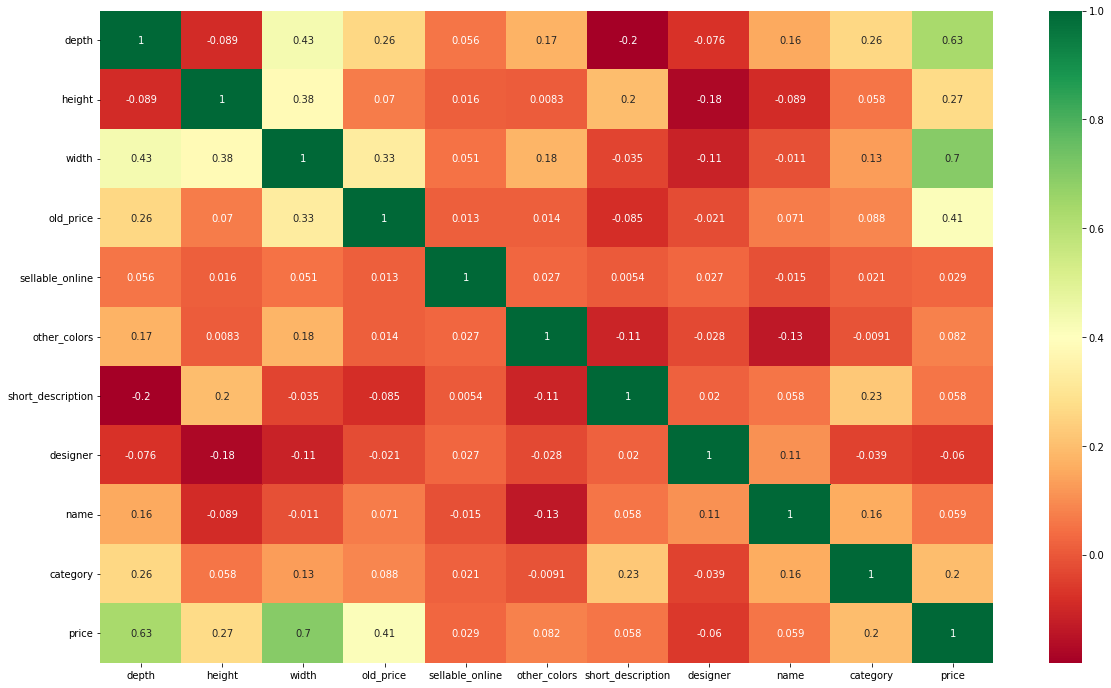

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

By looking at the correlation heat map there are mush negative correlations are present in the data set with respect to target varibales like sellable online, category,and price.Price and dimention are much correlated because size of the product decides the price of the product, So there are some significate relationships. 

#Reggression

Are any model assumptions violated?

Assumption 1: Appropriate Outcome Type

In [ ]:
print(df['category'].nunique())

17


There are 17 types of category in the data set so the target outcome is in multi classification type.

Assumption 2: Sufficiently large sample size

In [ ]:
df.shape

(3543, 11)

So the data set has sufficent data to solve the problem

Assumption 3: Absence of multicollinearity

In [ ]:
df.isnull().sum() 
df = df.dropna()
df.isnull().sum()

depth                0
height               0
width                0
old_price            0
sellable_online      0
other_colors         0
short_description    0
designer             0
name                 0
category             0
price                0
dtype: int64

There no multicollinearity in this data set 

Is there any multicollinearity in the model?

In [ ]:
!pip install auto-sklearn

In [ ]:
import autosklearn

In [ ]:
df.dtypes

depth                float64
height               float64
width                float64
old_price              int64
sellable_online         bool
other_colors          object
short_description     object
designer              object
name                  object
category              object
price                float64
dtype: object

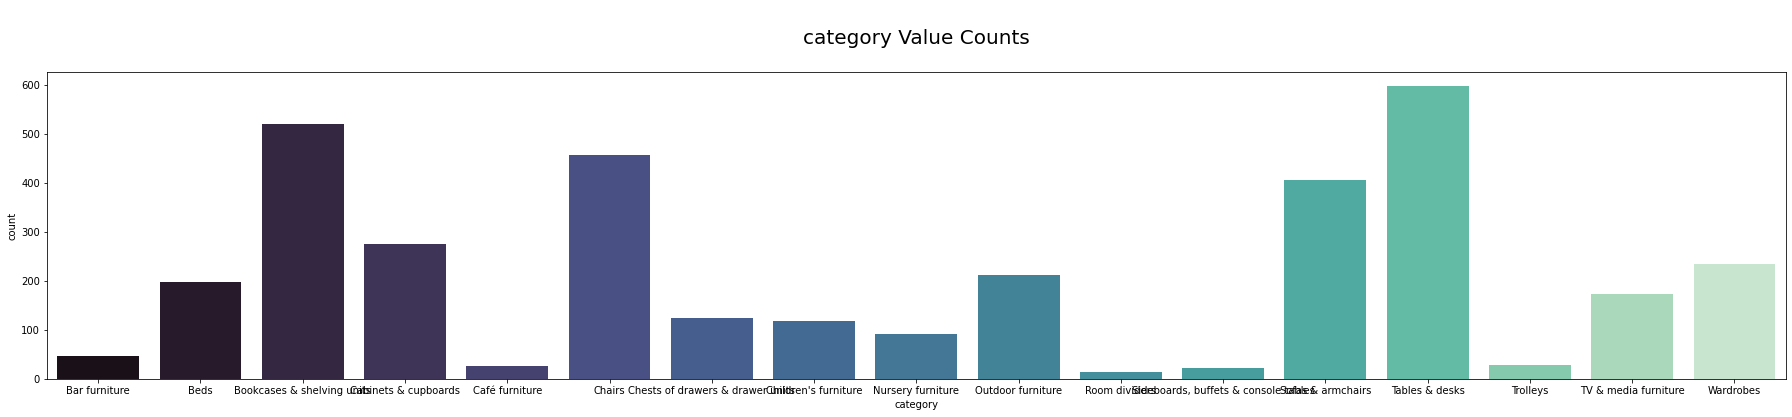

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from re import X
#Considering all the columns for ploting
columns= ['category']

plt.figure(figsize=(25,20))


#Ploting all the column using countplot to check ranges in numerical data and types in catagorical data
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 4 :
      ax = plt.subplot(4,1,plotnumber)
      sns.countplot(x = columns[i],data = df,ax = ax,palette='mako')
      plt.title(f"\n{columns[i]} Value Counts\n",fontsize = 20)
    plotnumber += 1

plt.tight_layout()
plt.show()


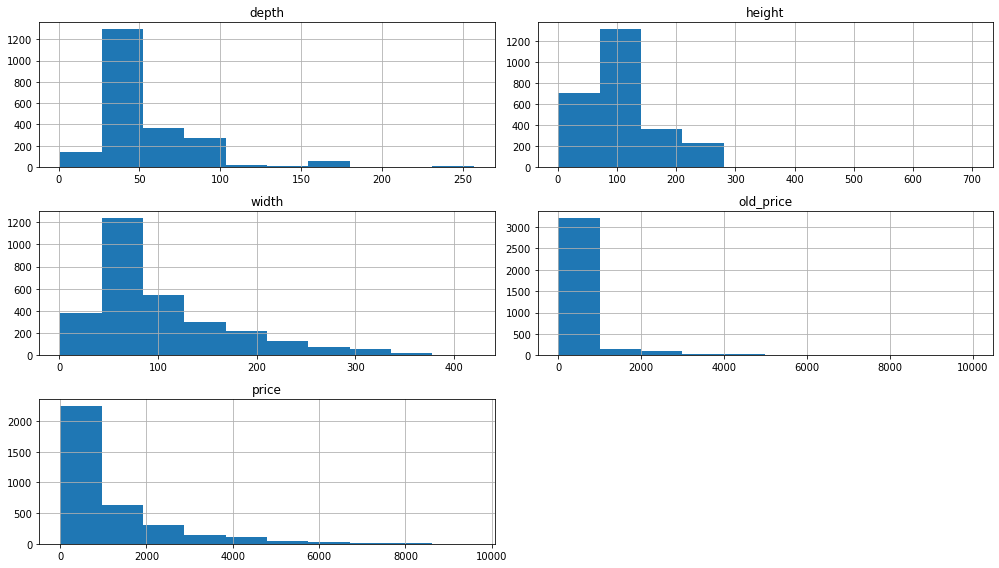

In [ ]:
df.hist(figsize=(14, 8))
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['sellable_online'] = le.fit_transform(df['sellable_online'])
df['other_colors'] = le.fit_transform(df['other_colors'])
df['short_description'] = le.fit_transform(df['short_description'])
df['designer'] = le.fit_transform(df['designer'])
df['name'] = le.fit_transform(df['name'])
df['category'] = le.fit_transform(df['category'])

df

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
0,44.0,95.0,50.0,0,1,0,92,104,60,5,129.0
1,40.0,43.0,141.0,3265,1,0,107,52,196,1,2905.0
2,60.0,236.0,150.0,0,1,1,889,87,191,16,3190.0
3,40.0,128.0,60.0,0,1,1,438,52,14,2,195.0
4,59.0,90.0,56.0,0,1,0,484,52,6,8,85.0
...,...,...,...,...,...,...,...,...,...,...,...
1836,157.0,85.0,110.0,2175,1,1,254,17,172,5,1740.0
1837,48.0,92.0,145.0,0,1,0,630,5,147,11,2100.0
1838,51.0,149.0,74.0,0,1,0,958,93,268,16,49.0
1839,38.0,214.0,276.0,0,1,0,685,5,132,3,4335.0


Building the Model using sklearn auto ML for regression 

In [ ]:
df = df.sample(frac=1, random_state=0)
df.reset_index(drop=True, inplace=True)

split_index = int(len(df) * 0.75)

train_df = df[:split_index]
test_df = df[split_index:]

train_df.head()

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
0,44.0,95.0,50.0,0,1,0,128,177,103,5,129.0
1,40.0,43.0,141.0,3265,1,0,160,90,401,1,2905.0
2,60.0,236.0,150.0,0,1,1,1574,139,396,16,3190.0
3,40.0,128.0,60.0,0,1,1,744,90,23,2,195.0
4,59.0,90.0,56.0,0,1,0,833,90,8,8,85.0


In [ ]:
X_train = train_df.to_numpy()[:, :-1]
y_train = train_df.to_numpy()[:, -1]

X_test = test_df.to_numpy()[:, :-1]
y_test = test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1380, 10), (1380,)), ((461, 10), (461,)))

In [ ]:
feature_types = ['Numerical']*4 + ['Categorical']*6

feature_types

['Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical']

In [ ]:
import autosklearn.regression

autosklearn_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
)

autosklearn_regressor.fit(X_train, y_train, feat_type=feature_types)

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=60, time_left_for_this_task=240)

In [ ]:
print(autosklearn_regressor.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1             0.76  random_forest  0.108061   7.611887
8            2             0.08       adaboost  0.160391  14.900535
3            3             0.16     libsvm_svr  0.180584   4.569584


From the above leader board we can conclude that random_forest with model id 2 gives us the highest accuracy of 76%.

In [ ]:
#@title
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, autosklearn_regressor.predict(X_train)), mae(y_test, autosklearn_regressor.predict(X_test))

(157.25470057402833, 276.3173164613852)

In the multivariate models are predictor variables independent of all the other predictor variables?

*  No, multicollinearity exists between most of the features in the data

Does the model make sense?

* Yes, for classifiying the category of the product Gradient Boosting Machine that the best possible next model, when combined with previous models, minimizes the overall prediction error.

#Binary Classification

With the same data set we can predict the product is sellable in online or not by using binary classification using H2o auto ML.

In [ ]:
!apt-get install default-jre

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
!java -version

openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 38 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=4a3a95d23763f6257e9948eec94f0c74941a5521246e3531eb002b31eb226f1b
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp3numblxq
  JVM stdout: /tmp/tmp3numblxq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp3numblxq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_robwav
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
h2o_df = h2o.import_file('/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
h2o_df.types

{'depth': 'int',
 'height': 'int',
 'width': 'int',
 'old_price': 'int',
 'sellable_online': 'enum',
 'other_colors': 'enum',
 'short_description': 'enum',
 'designer': 'enum',
 'name': 'enum',
 'category': 'enum',
 'price': 'real'}

In [ ]:
h2o_df.describe()

Rows:3543
Cols:11

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
type,int,int,int,int,enum,enum,enum,enum,enum,enum,real
mins,1.0,1.0,1.0,0.0,,,,,,,3.0
mean,54.53625866050808,103.10833653476757,105.3879051119278,297.21366073948633,,,,,,,1109.0536550945526
maxs,257.0,700.0,420.0,9985.0,,,,,,,9585.0
sigma,30.209637251274327,61.2786049821133,71.75787106336935,990.4893695583124,,,,,,,1392.5032349120734
zeros,0,0,0,2915,,,,,,,0
missing,1378,940,550,0,0,0,0,0,0,0,0
0,44.0,103.0,52.0,0.0,TRUE,No,"Bar stool with backrest, foldable, 74 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,149.0
1,45.0,102.0,40.0,0.0,TRUE,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395.0
2,47.0,103.0,46.0,0.0,TRUE,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395.0


In [ ]:
h2o_train,h2o_test,h2o_valid = h2o_df.split_frame(ratios=[.7,.15])

In [ ]:
h2o_train

depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price
45,102,40,0,TRUE,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395
47,103,46,0,TRUE,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395
53,104,43,295,TRUE,No,"Bar stool with backrest, in/outdoor, 74 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,177
52,114,43,0,TRUE,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,EKEDALEN,Bar furniture,345
50,100,60,0,TRUE,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,STIG,Bar furniture,69
60,43,74,0,TRUE,No,"Wall-mounted drop-leaf table, 74x60 cm",Marcus Arvonen,NORBERG,Bar furniture,225
45,91,40,0,TRUE,No,"Bar stool with backrest, 63 cm",Carina Bengs,INGOLF,Bar furniture,345
44,95,50,0,TRUE,No,"Bar stool with backrest, foldable, 63 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,129
nan,99,51,0,TRUE,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,265
nan,105,80,0,FALSE,No,"Bar table, 140x80 cm",Francis Cayouette,NORDVIKEN,Bar furniture,995


In [ ]:
target = h2o_df.pop('sellable_online')
h2o_df.concat([h2o_df,target])

depth,height,width,old_price,other_colors,short_description,designer,name,category,price,depth0,height0,width0,old_price0,other_colors0,short_description0,designer0,name0,category0,price0,sellable_online
44,103,52,0,No,"Bar stool with backrest, foldable, 74 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,149,44,103,52,0,No,"Bar stool with backrest, foldable, 74 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,149,TRUE
45,102,40,0,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395,45,102,40,0,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395,TRUE
47,103,46,0,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395,47,103,46,0,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395,TRUE
53,104,43,295,No,"Bar stool with backrest, in/outdoor, 74 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,177,53,104,43,295,No,"Bar stool with backrest, in/outdoor, 74 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,177,TRUE
52,114,43,0,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,EKEDALEN,Bar furniture,345,52,114,43,0,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,EKEDALEN,Bar furniture,345,TRUE
50,100,60,0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,STIG,Bar furniture,69,50,100,60,0,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,STIG,Bar furniture,69,TRUE
60,43,74,0,No,"Wall-mounted drop-leaf table, 74x60 cm",Marcus Arvonen,NORBERG,Bar furniture,225,60,43,74,0,No,"Wall-mounted drop-leaf table, 74x60 cm",Marcus Arvonen,NORBERG,Bar furniture,225,TRUE
45,91,40,0,No,"Bar stool with backrest, 63 cm",Carina Bengs,INGOLF,Bar furniture,345,45,91,40,0,No,"Bar stool with backrest, 63 cm",Carina Bengs,INGOLF,Bar furniture,345,TRUE
44,95,50,0,No,"Bar stool with backrest, foldable, 63 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,129,44,95,50,0,No,"Bar stool with backrest, foldable, 63 cm",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,129,TRUE
nan,99,51,0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,265,nan,99,51,0,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,FREKVENS,Bar furniture,265,TRUE


In [ ]:
y = "sellable_online"
x = h2o_df.columns


In [ ]:
print(x)

['depth', 'height', 'width', 'old_price', 'other_colors', 'short_description', 'designer', 'name', 'category', 'price']


In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos= ["StackedEnsemble","DeepLearning"], verbosity="info",nfolds=0)

In [ ]:
aml.train(x=x , y=y,training_frame=h2o_train,validation_frame=h2o_valid)

AutoML progress: |
13:27:54.926: Project: AutoML_1_20221107_132754
13:27:54.928: Cross-validation disabled by user: no fold column nor nfolds > 1.
13:27:54.928: Setting stopping tolerance adaptively based on the training frame: 0.019932344846421823
13:27:54.929: Build control seed: 10
13:27:54.929: training frame: Frame key: AutoML_1_20221107_132754_training_py_2_sid_b6c9    cols: 11    rows: 2517  chunks: 8    size: 402967  checksum: 9131896498648077400
13:27:54.930: validation frame: Frame key: py_4_sid_b6c9    cols: 11    rows: 521  chunks: 8    size: 369390  checksum: 6227733096385651080
13:27:54.930: leaderboard frame: Frame key: py_4_sid_b6c9    cols: 11    rows: 521  chunks: 8    size: 369390  checksum: 6227733096385651080
13:27:54.930: blending frame: NULL
13:27:54.931: response column: sellable_online
13:27:54.931: fold column: null
13:27:54.931: weights column: null
13:27:54.967: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20221107_132754


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    70                 70                          74253                  4            8            7.91429       5             39            23.4857

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00036706161378328436
RMSE: 0.019158852099833236
LogLoss: 0.0015365697351822105
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.611259368332922
       FALSE    TRUE    Error    Rate
-----  -------  ------  -------  ------------
FALSE  13       0       0        (0.0/13.0)
TRUE   0        2504    0        (0.0/2504.0)
Total  13       2504    0        (0.0/2517.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.611259     1         222
max f2                       0.611259     1         222
max f0point5                 0.611259     1         222
max accuracy                 0.611259     1         222
max precision                0.999996     1         0
max recall                   0.611259     1         222
max specificity              0.999996     1         0
max absolute_mcc             0.611259     1         222
max min_per_class_accuracy   0.611259     1         222
max mean_per_class_accuracy  0.611259     1         222
max tns                      0.999996     13        0
max fns                      0.999996     2503      0
max fps                      0.00370935   13        235
max tps                      0.611259     2504      222
max tnr                      0.999996     1         0
max fnr                      0.999996     0.999601  0
max fpr                      0.00370935   1         235
max tpr                      0.611259     1         222

Gains/Lift Table: Avg response rate: 99.48 %, avg score: 99.50 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0103298                   0.999995           1.00519   1.00519            1                0.999995  1                           0.999995            0.0103834       0.0103834                  0.519169  0.519169           0.0103834
2        0.0202622                   0.999995           1.00519   1.00519            1                0.999995  1                           0.999995            0.00998403      0.0203674                  0.519169  0.519169           0.0203674
3        0.0301947                   0.999995           1.00519   1.00519            1                0.999995  1                           0.999995            0.00998403      0.0303514                  0.519169  0.519169           0.0303514
4        0.0401271                   0.999995           1.00519   1.00519            1                0.999995  1                           0.999995            0.00998403      0.0403355                  0.519169  0.519169           0.0403355
5        0.0512515                   0.999995           1.00519   1.00519            1                0.999995  1                           0.999995            0.0111821       0.0515176     

In [ ]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_3_AutoML_1_20221107_132754,0.991296,0.0200175,0.999932,0.125,0.0565756,0.0032008
GBM_4_AutoML_1_20221107_132754,0.983075,0.0358498,0.999866,0.250967,0.0792364,0.0062784
XRT_1_AutoML_1_20221107_132754,0.966151,0.0285174,0.999727,0.375,0.0821101,0.00674206
GBM_2_AutoML_1_20221107_132754,0.958172,0.0252833,0.999648,0.125967,0.0697081,0.00485921
GBM_1_AutoML_1_20221107_132754,0.956963,0.0264792,0.999637,0.125967,0.0628274,0.00394728
GLM_1_AutoML_1_20221107_132754,0.947292,0.0178671,0.999543,0.125,0.0504691,0.00254713
DRF_1_AutoML_1_20221107_132754,0.920696,0.0264835,0.99927,0.25,0.0748597,0.00560397
XGBoost_3_AutoML_1_20221107_132754,0.882495,0.0383291,0.998899,0.5,0.0870399,0.00757595
XGBoost_2_AutoML_1_20221107_132754,0.743714,0.0434099,0.997352,0.5,0.0871716,0.00759889
XGBoost_1_AutoML_1_20221107_132754,0.642892,0.0454193,0.996422,0.5,0.0873159,0.00762407


In [ ]:
#@title
h2o_pred = aml.leader.predict(h2o_test)
h2o_pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,FALSE,TRUE
TRUE,8.27514e-06,0.999992
TRUE,9.04255e-06,0.999991
TRUE,3.15919e-05,0.999968
TRUE,1.32754e-05,0.999987
TRUE,9.10739e-06,0.999991
TRUE,1.16834e-05,0.999988
TRUE,1.58055e-05,0.999984
TRUE,8.1172e-06,0.999992
TRUE,6.89273e-06,0.999993
TRUE,6.89272e-06,0.999993


In the multivariate models are predictor variables independent of all the other predictor variables?

* No, multicollinearity exists between most of the features in the data

Does the model make sense?

* Yes, for classifiying the category of the product Gradient Boosting Machine that the best possible next model, when combined with previous models, minimizes the overall prediction error.


#Multiclass Classification

Ikea has many product in different category so in this problem we are going to predict the categories of the product using independent features.

In [ ]:
df_h2o=pd.read_csv('/content/IKEA_SA_Furniture_Web_Scrapings_sss.csv')
df_h2o['category'].value_counts()

Tables & desks                          597
Bookcases & shelving units              521
Chairs                                  457
Sofas & armchairs                       405
Cabinets & cupboards                    275
Wardrobes                               235
Outdoor furniture                       212
Beds                                    198
TV & media furniture                    173
Chests of drawers & drawer units        124
Children's furniture                    117
Nursery furniture                        92
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

From the table above, we have 16 categories classes. The model will classify a category into one of the categories classes.

In [ ]:
target={'Bookcases & shelving units':0, 'Chairs':1, 'Sofas & armchairs':2, 'Cabinets & cupboards':3, 'Wardrobes':4, 'Outdoor furniture':5,'Beds':6,'TV & media furniture':7,'Chests of drawers & drawer units':8,'Children\'s furniture':9,'Nursery furniture':10,'Nursery furniture':11,'Bar furniture':12,'Trolleys':13,'Café furniture':14,'Sideboards, buffets & console tables':15,'Room dividers':16,'Tables & desks':17}

df_h2o['target']=df_h2o['category'].map(target)

df_h2o

,depth,height,width,old_price,sellable_online,other_colors,short_description,designer,name,category,price,target
0,44.0,103.0,52.0,0,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,FRANKLIN,Bar furniture,149.0,12
1,45.0,102.0,40.0,0,True,No,"Bar stool with backrest, 74 cm",Carina Bengs,INGOLF,Bar furniture,395.0,12
2,47.0,103.0,46.0,0,True,No,"Bar stool with backrest, 74 cm",Nike Karlsson,NORRARYD,Bar furniture,395.0,12
3,53.0,104.0,43.0,295,True,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,FREKVENS,Bar furniture,177.0,12
4,52.0,114.0,43.0,0,True,No,"Bar stool with backrest, 75 cm",Ehlén Johansson,EKEDALEN,Bar furniture,345.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3538,50.0,NaN,91.0,820,True,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,ELVARLI,Wardrobes,750.0,4
3539,50.0,NaN,135.0,1755,True,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,ELVARLI,Wardrobes,1572.0,4
3540,50.0,NaN,175.0,1050,True,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,ELVARLI,Wardrobes,924.0,4
3541,50.0,NaN,178.0,3130,True,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,ELVARLI,Wardrobes,2745.0,4


In [ ]:
from sklearn.model_selection import train_test_split
h2o_X_train, h2o_X_test = train_test_split(df_h2o, test_size=0.2, random_state=111)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
stemmer = nltk.stem.SnowballStemmer('english')

In [ ]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

def preprocessing(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tf = TfidfVectorizer(tokenizer=preprocessing, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))

In [ ]:
train_vectors = vectorizer_tf.fit_transform(h2o_X_train.category) 
test_vectors = vectorizer_tf.transform(h2o_X_test.category)


In [ ]:
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())

In [ ]:
train_df=pd.concat([train_df,h2o_X_train['target'].reset_index(drop=True)], axis=1)
test_df=pd.concat([test_df,h2o_X_test['target'].reset_index(drop=True)], axis=1)

In [ ]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
aml = H2OAutoML(max_models = 5, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)


Which hyperparameters are important?
Stacked Ensemble is not required for this model so 

In [ ]:
x=vectorizer_tf.get_feature_names()
y='target'

In [ ]:
aml.train(x = x, y = y, training_frame = h2o_train_df, validation_frame=h2o_test_df)

AutoML progress: |
15:56:44.55: Project: AutoML_3_20221107_155644
15:56:44.55: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:56:44.56: Setting stopping tolerance adaptively based on the training frame: 0.018784518919133613
15:56:44.56: Build control seed: 10
15:56:44.56: training frame: Frame key: AutoML_3_20221107_155644_training_Key_Frame__upload_b223d3ae676dc88a23ed77fc4d23423f.hex    cols: 44    rows: 2834  chunks: 1    size: 97744  checksum: -1880681459482484584
15:56:44.56: validation frame: Frame key: Key_Frame__upload_805de13947cfde96451ae46c06b24b02.hex    cols: 44    rows: 709  chunks: 1    size: 25760  checksum: -2318235388765059736
15:56:44.57: leaderboard frame: Frame key: Key_Frame__upload_805de13947cfde96451ae46c06b24b02.hex    cols: 44    rows: 709  chunks: 1    size: 25760  checksum: -2318235388765059736
15:56:44.57: blending frame: NULL
15:56:44.57: response column: target
15:56:44.57: fold column: null
15:56:44.57: weights column: null
15:56:44

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,13869.0,10.0,16.0,12.36,17.0,17.0,17.0
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2022-11-07 15:56:57,0.013 sec,0.0,nan,nan,nan,nan,nan,nan
,2022-11-07 15:56:57,0.110 sec,5.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:57,0.183 sec,10.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:57,0.277 sec,15.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:57,0.377 sec,20.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:57,0.475 sec,25.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:58,0.582 sec,30.0,0.0,0.0,0.0,0.0,0.0,0.0
,2022-11-07 15:56:58,0.666 sec,35.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DRF_1_AutoML_3_20221107_155644,0,0,0,0,0
XGBoost_2_AutoML_3_20221107_155644,5.28589e-05,2.79406e-09,3.83128e-05,1.56841e-05,2.79406e-09
XGBoost_1_AutoML_3_20221107_155644,0.00045277,2.05001e-07,5.51564e-05,2.85183e-05,2.05001e-07
GLM_1_AutoML_3_20221107_155644,0.00158731,2.51957e-06,0.00102313,0.000428702,2.51957e-06
GBM_1_AutoML_3_20221107_155644,0.140941,0.0198643,0.0190693,0.00912538,0.0198643



In the multivariate models are predictor variables independent of all the other predictor variables?

* From the above predictor variable imporatnce we can conclude that Yes, predictor variables independent of all the other predictor variables.

In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Short description is the most significant predictor variables and removed item_id which is insignificant ones from the model

Does the model make sense?
* Yes, the model make sense beacuse given a set of data, DRF generates a forest of classification or regression trees, rather than a single classification or regression tree. Each of these trees is a weak learner built on a subset of rows and columns. More trees will reduce the variance. Both classification and regression take the average prediction over all of their trees to make a final prediction, whether predicting for a class or numeric value. 

Does regularization help?
* Yes , significantly reduces the variance of the model, without substantial increase in its bias.

Which independent variables are significant?
* Short description is the most significant predictor variables

#Conclusion

The problems of Ikea furniture is solved by using three different models using AUTO ML. 
* Firstly Reggression to predict the prices of the product which was slighly more correlated with the size of the product and using sklearn auto ML I was able to get 76% of accuracy using random forest model
* Secondly binary classification to predict the product is sellable online or not sellable online I used H2o AUTO ML to preprocessing the data and prediting the categorical attribute. I was able to get 98% of accuracy using Gradient Boosting Machine model
* Thirdly multiclass classification to predict the category of the product by used h2o Auto ML to preprocessing the data and prediting the categorical attribute. I was able to get 88% of accuracy using Gradient Boosting Machine model

References
Refered the following links to understand the functions

1. Auto-Sklearn Documentation

2. Pandas Official Documentation

3. H2O - Auto ML Documentation

4. Seaborn: statistical data visualization


Copyright 2022 Prem kumar Raghava Manoharan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.